In [15]:
import numpy as np
from statistics import median
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import sys
import seaborn as sns

print(sys.executable)

/Users/isabellegarnreiter/opt/anaconda3/envs/vesicleSTORM/bin/python


In [2]:
def pval_significance(pval):
    if pval < 0.0005:
        significance = '***'
    elif pval<0.005:
        significance = '**' 
    elif pval<0.05:
        significance = '*'
    elif pval>0.05:
        significance = '-'
        
    return significance

In [29]:
#upload csv file
storm_data = pd.read_pickle('/Users/isabellegarnreiter/Desktop/PSD/PSDstorm_data.pkl')

#data filtering 
storm_data['markertype and DIV'] = storm_data['647nm'] + storm_data['DIV']

#remove data in which the mean nearest neighbour distance from 1 channel to another is above a certain threshold. this value might differe depending on the targeted markers.
storm_data = storm_data[storm_data['mean_coloc_680'] <=1000]

#filter out clusters which are too small. Including these tiny clusters might create problems in the analysis. 
storm_data = storm_data[storm_data['volume'] >= 0.0266]
storm_data = storm_data[storm_data['volume'] <= 2]

#remove clusters which contain too many or too few points
storm_data = storm_data[storm_data['point count'] >=50]
storm_data = storm_data[storm_data['point count'] <=10000]


<Axes: xlabel='volume', ylabel='point count'>

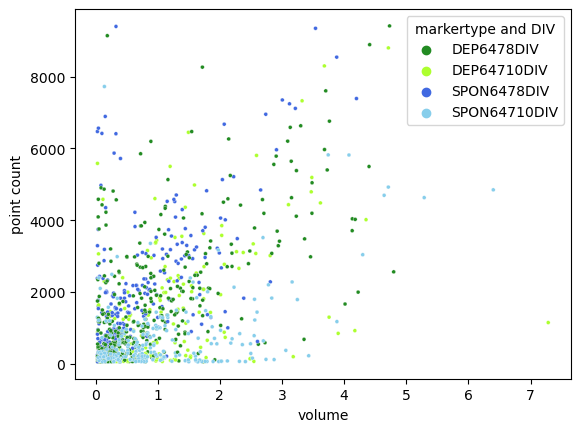

In [21]:
conditions = ['DEP and 8DIV', 'SPON and 8DIV', 'DEP and 10DIV', 'SPON and 10DIV']
custom_palette = ['forestgreen', 'greenyellow', 'royalblue', 'skyblue']

sns.scatterplot(data=storm_data, x = 'volume', y = 'point count' , hue = 'markertype and DIV', s=8, palette=custom_palette)

#sns.regplot(data=storm_data, x = 'volume', y = 'point_count')

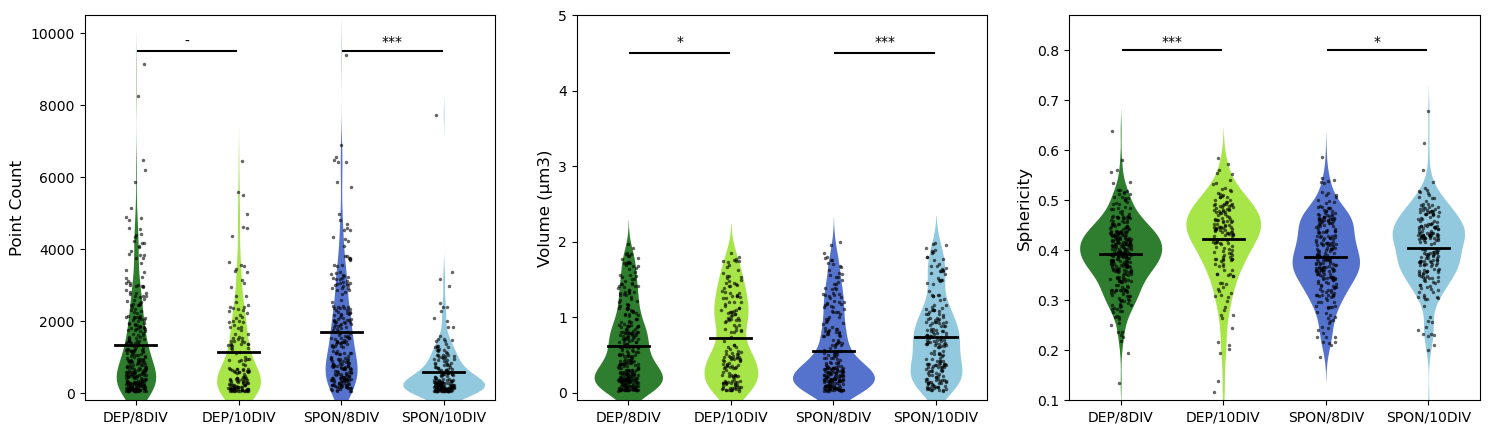

In [30]:
x = 'markertype and DIV'
custom_palette = ['forestgreen', 'greenyellow', 'royalblue', 'skyblue']

order = ['DEP6478DIV', 'DEP64710DIV', 'SPON6478DIV', 'SPON64710DIV']
conditions = ['DEP/8DIV',  'DEP/10DIV', 'SPON/8DIV', 'SPON/10DIV']

# Set up plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


# Point count plot
sns.violinplot(data=storm_data, x=x, y='point count', ax=axes[0], order=order, 
             linewidth=0, palette=custom_palette, alpha=0.5)
sns.stripplot(data=storm_data, x=x, y='point count', 
              ax=axes[0], order=order, jitter=True, color='black', alpha=0.6, size=2.5)

axes[0].set_xlim([-0.5, len(storm_data[x].unique())-0.5])
axes[0].set_ylim([-200, 10500])

mean_values = [storm_data[storm_data[x] == order]['point count'].mean() for order in order]
for i, mean_val in enumerate(mean_values):
    axes[0].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

# calculate the p-value and plot 
ttest_dep_pc, pval_dep_pc = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='DEP6478DIV']['point count'], 
                           storm_data[storm_data['markertype and DIV']=='DEP64710DIV']['point count'])

axes[0].text(0.25, 0.95, f"{pval_significance(pval_dep_pc)}", ha='center', va='top', transform=axes[0].transAxes)
axes[0].axhline(9500, 0.13, 0.37, color='black', linewidth=1.5)
    

ttest_spon_pc, pval_spon_pc = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='SPON6478DIV']['point count'], 
                           storm_data[storm_data['markertype and DIV']=='SPON64710DIV']['point count'])

axes[0].text(0.75, 0.95, f"{pval_significance(pval_spon_pc)}", ha='center', va='top', transform=axes[0].transAxes)
axes[0].axhline(9500, 0.63, 0.87, color='black', linewidth=1.5)
    

# Volume plot
sns.violinplot(data=storm_data, x=x, y='volume', ax=axes[1], order=order,
             linewidth=0, palette=custom_palette, alpha=0.5)
sns.stripplot(data=storm_data, x=x, y='volume', 
              ax=axes[1], order=order, jitter=True, color='black', alpha=0.6, size=2.5)

axes[1].set_xlim([-0.5, len(storm_data[x].unique())-0.5])
axes[1].set_ylim([-0.1, 5])

mean_values = [storm_data[storm_data[x] == order]['volume'].mean() for order in order]
for i, mean_val in enumerate(mean_values):
    axes[1].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

# calculate the p-value and plot 
ttest_dep_vol, pval_dep_vol = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='DEP6478DIV']['volume'], 
                           storm_data[storm_data['markertype and DIV']=='DEP64710DIV']['volume'])

axes[1].text(0.25, 0.95, f"{pval_significance(pval_dep_vol)}", ha='center', va='top', transform=axes[1].transAxes)
axes[1].axhline(4.5, 0.13, 0.37, color='black', linewidth=1.5)
    

ttest_spon_vol, pval_spon_vol = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='SPON6478DIV']['volume'], 
                           storm_data[storm_data['markertype and DIV']=='SPON64710DIV']['volume'])

axes[1].text(0.75, 0.95, f"{pval_significance(pval_spon_vol)}", ha='center', va='top', transform=axes[1].transAxes)
axes[1].axhline(4.5, 0.63, 0.87, color='black', linewidth=1.5)
        


# Sphericity plot
sns.violinplot(data=storm_data, x=x, y='spherecity', ax=axes[2], order=order, 
               label=conditions, linewidth=0, palette=custom_palette, alpha=1)
sns.stripplot(data=storm_data, x=x, y='spherecity', 
              ax=axes[2], order=order, jitter=True, color = 'black', alpha=0.6, size=2.5)

axes[2].set_xlim([-0.5, len(storm_data[x].unique())-0.5])
axes[2].set_ylim([0.1, 0.87])

mean_values = [storm_data[storm_data[x] == order]['spherecity'].mean() for order in order]
for i, mean_val in enumerate(mean_values):
    axes[2].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

ttest_dep_sph, pval_dep_sph = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='DEP6478DIV']['spherecity'], 
                           storm_data[storm_data['markertype and DIV']=='DEP64710DIV']['spherecity'])

axes[2].text(0.25, 0.95, f"{pval_significance(pval_dep_sph)}", ha='center', va='top', transform=axes[2].transAxes)
axes[2].axhline(0.8, 0.13, 0.37, color='black', linewidth=1.5)
    
# calculate the p-value and plot 
ttest_spon_sph, pval_spon_sph = sc.ttest_ind(storm_data[storm_data['markertype and DIV']=='SPON6478DIV']['spherecity'], 
                           storm_data[storm_data['markertype and DIV']=='SPON64710DIV']['spherecity'])

axes[2].text(0.75, 0.95, f"{pval_significance(pval_spon_sph)}", ha='center', va='top', transform=axes[2].transAxes)
axes[2].axhline(0.8, 0.63, 0.87, color='black', linewidth=1.5)
       
    
# Add titles and axis labels
ylabels = ['Point Count', 'Volume (µm3)', 'Sphericity']

for i in [0,1,2]:
    axes[i].set_ylabel(ylabels[i], fontsize=12)
    axes[i].set_xticks([0, 1, 2, 3])
    axes[i].set_xticklabels(conditions)
    axes[i].set(xlabel = None)

# Show plot

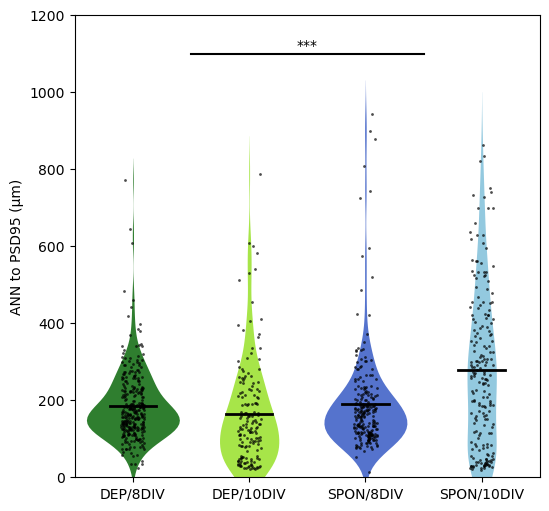

In [32]:
x = 'markertype and DIV'
y = 'mean_coloc_680'
custom_palette = ['forestgreen', 'greenyellow', 'royalblue', 'skyblue']


# Update the order of conditions
order = ['DEP6478DIV', 'DEP64710DIV', 'SPON6478DIV', 'SPON64710DIV']
conditions = ['DEP/8DIV',  'DEP/10DIV', 'SPON/8DIV', 'SPON/10DIV']


# Calculate the p-value for the independent t-test
ttest_ANN, pval_ANN = sc.ttest_ind(storm_data[storm_data['647nm']=='DEP647'][y], 
                           storm_data[storm_data['647nm']=='SPON647'][y])


# Set up plot
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

# Volume plot with updated order

sns.violinplot(data=storm_data.sort_values(by=[x]), x=x, y=y, order=order, 
             linewidth=0, palette=custom_palette)
sns.stripplot(data=storm_data.sort_values(by=[x]), x=x, y=y, order=order, jitter=True, color='black', alpha=0.7, size=2)


plt.xlim([-0.5, len(conditions)-0.5])
plt.ylim([0,1200])

mean_values = [storm_data[storm_data[x] == order][y].mean() for order in order]

for i, mean_val in enumerate(mean_values):
    plt.plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)

# Annotate the graph with p-value
axes.text(0.5, 0.95, f"{pval_significance(pval_ANN)}", ha='center', va='top', transform=axes.transAxes)
axes.axhline(1100, 0.25, 0.75, color='black', linewidth=1.5)


# Update x-axis tick labels and axis labels
axes.set_xticklabels(conditions, fontsize=10)
axes.set_ylabel('ANN to PSD95 (µm)', fontsize=10)
axes.set(xlabel=None)
plt.show()


169.27347343710773
215.96804675989395


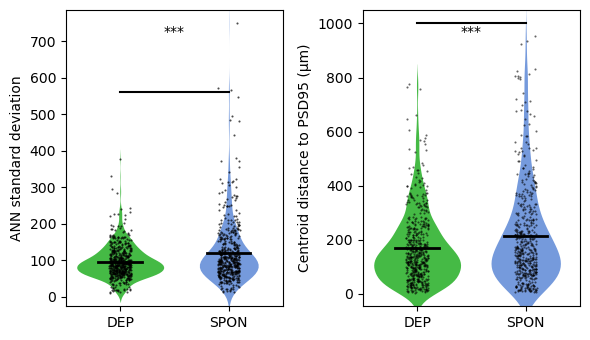

In [24]:
x = '647nm'
custom_palette = ['limegreen', 'cornflowerblue']
conditions = ['DEP', 'SPON']

fig, axes = plt.subplots(1, 2, figsize=(6, 3.5))


sns.violinplot(data=storm_data.sort_values(by=[x]), x=x, y='stderror_coloc_680', ax=axes[0], 
             linewidth=0, palette=custom_palette, alpha=0.5)
sns.stripplot(data=storm_data.sort_values(by=[x]), x=x, y='stderror_coloc_680', 
              ax=axes[0], jitter=True, color='black', alpha=0.7, size=1.5)

axes[0].set_xlim([-0.5, len(storm_data[x].unique())-0.5])
for i, group in enumerate(storm_data.groupby(x)):
    mean_val = group[1]['stderror_coloc_680'].mean()
    axes[0].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)
axes[0].set_xticklabels(conditions, fontsize=10)
axes[0].set_ylabel('ANN standard deviation')
axes[0].set(xlabel=None)

ttest_std, pval_std = sc.ttest_ind(storm_data[storm_data[x]=='DEP647']['stderror_coloc_680'], 
                           storm_data[storm_data[x]=='SPON647']['stderror_coloc_680'])

axes[0].text(0.5, 0.95, f"{pval_significance(pval_std)}", ha='center', va='top', transform=axes[0].transAxes)
axes[0].axhline(560, 0.25, 0.75, color='black', linewidth=1.5)


# centroid distance to psd plot
sns.violinplot(data=storm_data.sort_values(by=[x]), x=x, y='centroid_dist_647_to_680', ax=axes[1], 
             linewidth=0, palette=custom_palette, alpha=0.5)
sns.stripplot(data=storm_data.sort_values(by=[x]), x=x, y='centroid_dist_647_to_680', 
              ax=axes[1], jitter=True, color='black', alpha=0.6, size=1.5)

axes[1].set_xlim([-0.5, len(storm_data[x].unique())-0.5])
for i, group in enumerate(storm_data.groupby(x)):
    mean_val = group[1]['centroid_dist_647_to_680'].mean()
    print(mean_val)
    axes[1].plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)
axes[1].set_xticklabels(conditions, fontsize=10)
axes[1].set_ylabel('Centroid distance to PSD95 (µm)', fontsize=10)
axes[1].set(xlabel=None)

ttest_cent, pval_cent = sc.ttest_ind(storm_data[storm_data[x]=='DEP647']['centroid_dist_647_to_680'], 
                           storm_data[storm_data[x]=='SPON647']['centroid_dist_647_to_680'])

axes[1].text(0.5, 0.95, f"{pval_significance(pval_cent)}", ha='center', va='top', transform=axes[1].transAxes)
axes[1].axhline(1000, 0.25, 0.75, color='black', linewidth=1.5)


plt.tight_layout()

127.44594495234311
175.86651219277573


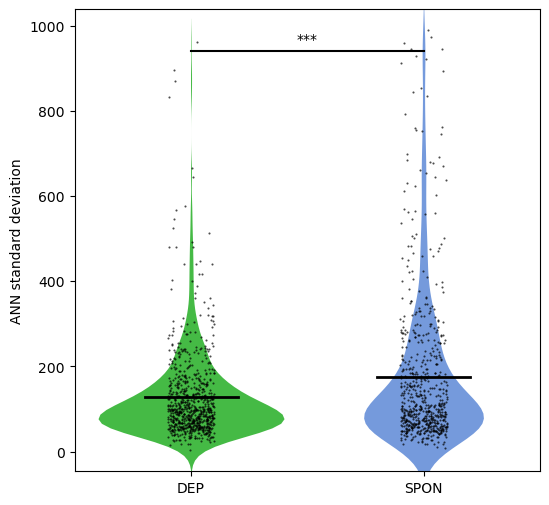

In [24]:


x = '647nm'
custom_palette = ['limegreen', 'cornflowerblue']
conditions = ['DEP', 'SPON']
storm_data['median'] = storm_data['nearest_neighbor_680'].apply(lambda x:median(x))

fig, axes = plt.subplots(1, 1, figsize=(6, 6))

# variance plot
sns.violinplot(data=storm_data.sort_values(by=[x]), x=x, y='median', ax=axes, 
             linewidth=0, palette=custom_palette, alpha=0.5)
sns.stripplot(data=storm_data.sort_values(by=[x]), x=x, y='median', 
              ax=axes, jitter=True, color='black', alpha=0.7, size=1.5)

axes.set_xlim([-0.5, len(storm_data[x].unique())-0.5])
for i, group in enumerate(storm_data.groupby(x)):
    mean_val = group[1]['median'].mean()
    print(mean_val)
    axes.plot([i-0.2, i+0.2], [mean_val, mean_val], 'k-', lw=2)
axes.set_xticklabels(conditions, fontsize=10)
axes.set_ylabel('ANN standard deviation')
axes.set(xlabel=None)

ttest_std, pval_std = sc.ttest_ind(storm_data[storm_data[x]=='DEP647']['median'], 
                           storm_data[storm_data[x]=='SPON647']['median'])

axes.text(0.5, 0.95, f"{pval_significance(pval_std)}", ha='center', va='top', transform=axes.transAxes)
axes.axhline(940, 0.25, 0.75, color='black', linewidth=1.5)



In [38]:
sns.scatterplot(data=storm_data, x="median", y='centroid_dist_647_to_680', hue = '647nm', alpha=0.5)

ValueError: Could not interpret value `median` for parameter `x`

In [43]:
storm_data.iloc[20][]

array([[ 4606.384, 19737.389,   731.209],
       [ 4597.339, 19783.254,   543.755],
       [ 4632.877, 19753.242,   697.667],
       ...,
       [ 5638.581, 20005.936,   290.276],
       [ 5676.542, 19981.34 ,   276.045],
       [ 4715.951, 19214.875,   740.585]])

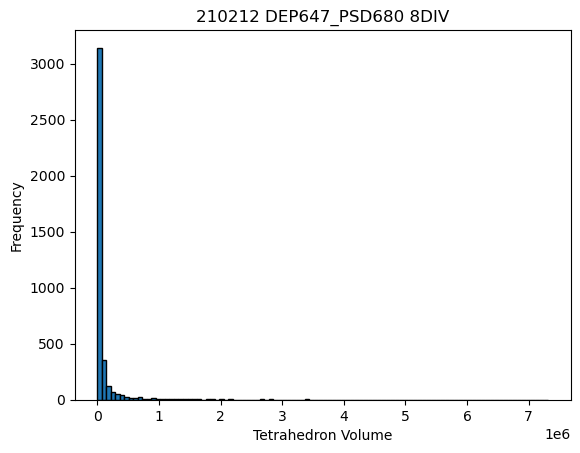

In [28]:
#tesselation analysis
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d import Axes3D
loc=1
points = storm_data.iloc[loc]['points']

# Create Delaunay triangulation
triangulation = Delaunay(points)

# Calculate tetrahedron volumes (3D equivalent of triangle areas)
tetrahedron_volumes = []
for simplex in triangulation.simplices:
    tetrahedron = points[simplex]
    tetrahedron_volume = abs(np.linalg.det(np.vstack((tetrahedron.T, np.ones(len(tetrahedron)))))) / 6.0
    tetrahedron_volumes.append(tetrahedron_volume)

# Plot a histogram of tetrahedron volumes
plt.hist(tetrahedron_volumes, bins=100, edgecolor='black')
plt.xlabel('Tetrahedron Volume')
plt.ylabel('Frequency')
plt.title(storm_data.iloc[loc]['FileName'])
plt.show()

In [49]:
storm_data.iloc[20]['FileName']

'210212 DEP647_PSD680 8DIV'

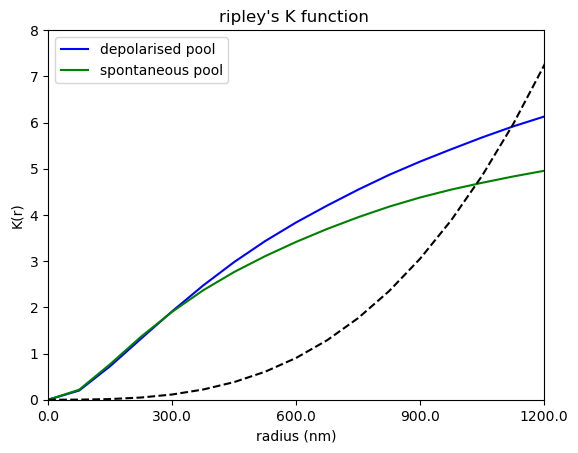

In [837]:
#univariate ripleyk

radii = np.linspace(0,1.5,21)

dep_ripley = storm_data[storm_data['647nm'] == 'DEP647']['univariate_ripleyk'].to_numpy()
spon_ripley = storm_data[storm_data['647nm'] == 'SPON647']['univariate_ripleyk'].to_numpy()

csr = (radii**3)*np.pi*4/3

mean_dep_ripley = np.mean(dep_ripley, axis=0)
mean_spon_ripley = np.mean(spon_ripley, axis=0)
std_dep_ripley = np.std(dep_ripley, axis=0)
std_spon_ripley = np.std(spon_ripley, axis=0)

plt.plot(np.array([mean_dep_ripley, mean_spon_ripley]).T)
plt.plot(csr, c='black', linestyle = '--')

# plt.errorbar(
#     x=np.arange(len(mean_dep_ripley)),
#     y=mean_dep_ripley,
#     yerr=std_dep_ripley,
#     color='blue',
#     ecolor='lightblue',
#     label='depolarised pool',
# )
# plt.errorbar(
#     x=np.arange(len(mean_spon_ripley)),
#     y=mean_spon_ripley,
#     yerr=std_spon_ripley,
#     color='green',
#     ecolor='lightgreen',
#     label='spontaneous pool',
# )

# plt.axhline(y=0, color='black', linestyle='-')

plt.gca().get_lines()[0].set_color('blue')  # dep_ripley line color
plt.gca().get_lines()[1].set_color('green')  # spon_ripley line color


# Plot vertical dotted lines at the maxima
# dep_max_idx = np.argmax(np.mean(dep_ripley, axis=0))
# spon_max_idx = np.argmax(np.mean(spon_ripley, axis=0))

# plt.axvline(x=dep_max_idx, color='blue', linestyle=':', linewidth=1)
# plt.axvline(x=spon_max_idx, color='green', linestyle=':', linewidth=1)

plt.xticks(list(np.linspace(0,20,6)), labels=np.linspace(0,1500,6))
plt.xlim(0,16)
plt.ylim(0,8)
# Add titles and axis labels
plt.ylabel("K(r)")
plt.xlabel('radius (nm)')
plt.legend(['depolarised pool', 'spontaneous pool'])
plt.title("ripley's K function ")
plt.show()
# Show plot

In [383]:
sc.kstest(mean_dep_ripley, mean_spon_ripley)

KstestResult(statistic=0.38095238095238093, pvalue=0.09481656218610322, statistic_location=5.327065452283748, statistic_sign=-1)

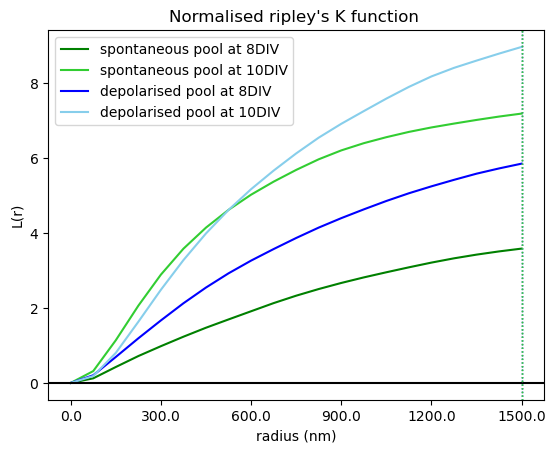

In [331]:
#multivariate ripleyk - not in use


radii = np.linspace(0,1.5,21)

spon_8_r = storm_data[storm_data['markertype and DIV']=='SPON6478DIV']['univariate_ripleyk'].to_numpy()
spon_10_r = storm_data[storm_data['markertype and DIV']=='SPON64710DIV']['univariate_ripleyk'].to_numpy()
dep_8_r = storm_data[storm_data['markertype and DIV']=='DEP6478DIV']['univariate_ripleyk'].to_numpy()
dep_10_r = storm_data[storm_data['markertype and DIV']=='DEP64710DIV']['univariate_ripleyk'].to_numpy()

csr = radii*np.pi*4/3

plt.plot(np.array([np.mean(spon_8_r, axis=0), 
                   np.mean(spon_10_r, axis=0),
                   np.mean(dep_8_r, axis=0),
                   np.mean(dep_10_r, axis=0)]).T)
plt.axhline(y=0, color='black', linestyle='-')

plt.gca().get_lines()[0].set_color('green')  # dep_ripley line color
plt.gca().get_lines()[1].set_color('limegreen')  # dep_ripley line color
plt.gca().get_lines()[2].set_color('blue')  # spon_ripley line color
plt.gca().get_lines()[3].set_color('skyblue')  # spon_ripley line color


# Plot vertical dotted lines at the maxima
spon_8_max_idx = np.argmax(np.mean(spon_8_r, axis=0))
dep_8_max_idx = np.argmax(np.mean(dep_8_r, axis=0))
spon_10_max_idx = np.argmax(np.mean(spon_10_r, axis=0))
dep_10_max_idx = np.argmax(np.mean(dep_10_r, axis=0))


plt.axvline(x=dep_8_max_idx, color='blue', linestyle=':', linewidth=1)
plt.axvline(x=spon_8_max_idx, color='green', linestyle=':', linewidth=1)
plt.axvline(x=dep_10_max_idx, color='skyblue', linestyle=':', linewidth=1)
plt.axvline(x=spon_10_max_idx, color='limegreen', linestyle=':', linewidth=1)

plt.xticks(list(np.linspace(0,20,6)), labels=np.linspace(0,1500,6))
# Add titles and axis labels
plt.ylabel("L(r)")
plt.xlabel('radius (nm)')
plt.legend(['spontaneous pool at 8DIV', 'spontaneous pool at 10DIV', 'depolarised pool at 8DIV', 'depolarised pool at 10DIV'])
plt.title("Normalised ripley's K function ")
plt.show()
# Show plot